# Analiza zbranih podatkov
V tej datoteki je narejena analiza podatkov, zbranih v datoteki zbrani_podatki.csv. 

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

Najprej si oglejmo podatke v obliki tabele.

In [37]:
podatki = pd.read_csv('zbrani_podatki.csv', dtype={"LETO": "Int32"}, index_col="ID")
pd.options.display.max_rows = 50
podatki.head(20)

,LETO,AVTOR,MESTO,DRŽAVA,TABLATURA,INSTRUMENT,STRUNE,RAZPRAVA
ID,,,,,,,,
0,0,NaN,NaN,NaN,German tablature,lute,5,NE
1,1460,NaN,Brunswick,Germany,NaN,lute,5,NE
2,0,NaN,Königstein,Germany,German tablature,lute,5,NE
3,0,NaN,Fritzlar,Germany,keyboard tablature,lute,5,NE
4,0,NaN,NaN,NaN,"Neapolitan tablature, Italian tablature, Frenc...","lute, guitar",6,NE
5,0,NaN,NaN,Germany,NaN,lute,NaN,NE
6,0,NaN,NaN,NaN,Neapolitan tablature,lute,7,NE
7,0,NaN,NaN,NaN,NaN,lute,6,NE
8,0,NaN,NaN,NaN,Italian tablature,lute,6,NE


Kot vidimo, v tabeli manjka kar nekaj podatkov. Zaradi tega bomo morali pri spodnji analizi uporabljati le tista dela, za katera je podatek, ki nas zanima, znan.

## Tekmovanje med državami

Oglejmo si najprej kako se države merijo po številu izdanih del za lutnjo in kitaro.

Text(0.5, 1.0, 'Število izdanih del za lutnjo po državah')

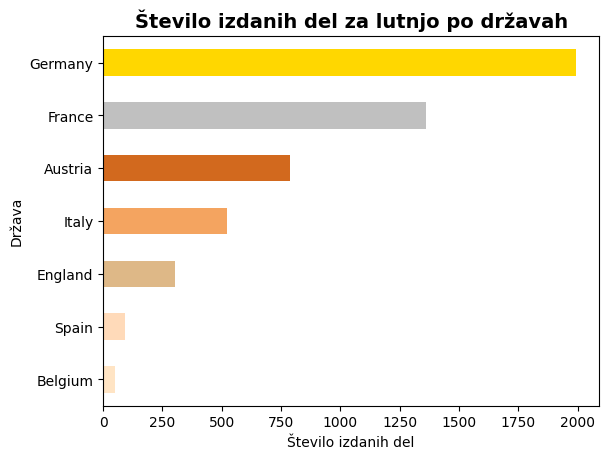

In [38]:
podatki_države = podatki[podatki.DRŽAVA != "nan"].groupby("DRŽAVA")
podatki_države.size().sort_values().tail(7).plot.barh(
    ylabel="Država", xlabel="Število izdanih del", 
    color=["bisque", "peachpuff", "burlywood", "sandybrown", "chocolate", "silver", "gold"])
plt.title("Število izdanih del za lutnjo po državah", fontsize=14, weight="bold")

Vidimo, da je bilo največ del izdanih v Nemčiji, kateri sledijo Francija, Avstrija in Italija.

V nadaljevanju bomo opazovali tudi kako so se dela za lutnjo in kitaro spreminjala skozi čas, zato uvedemo naslednji parameter "ČAS", ki nam bo pomagal pri tej analizi. Kot je prikazano spodaj, pa je natančna letnica izdaje pri slabi polovici del neznana. Na srečo pa so dela navedena v približnem časovnem sosledju (kolikor ga je pač mogoče določiti).

In [39]:
podatki[podatki.LETO == 0].groupby("LETO").size()

LETO
0    4338
dtype: int64

Zato bomo definirali "ČAS" kar iz zaporednega sosledja navedenih del, pri čemer smo za eno enoto časa vzeli 500 zaporednih del. Na tak način sicer časovna lestvica ne bo linearna, ampak vsaj ne bo izpustila polovico del pri analizi. To je smiselno tudi zato, ker nas pri analizi večinoma zanima le približno nahajanje v času in ne točna letnica, da si lahko izoblikujemo širši pogled na zgodovinsko dogajanje.

In [40]:
podatki["ČAS"] = podatki.index // 500

Oglejmo si sedaj kako se je skozi čas spreminjalo število izdanih del za lutnjo in kitaro v posameznih državah.

Text(11.3, 270, '1800 - 1850')

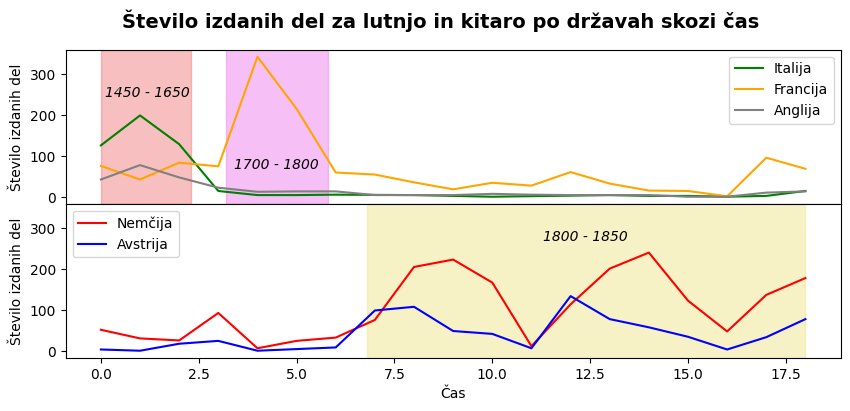

In [71]:
fig = plt.figure(figsize = (10, 4),)
gs = fig.add_gridspec(2, hspace=0)
axes= gs.subplots(sharex= True, sharey= True)

for ax in axes.flat:
    ax.set(ylabel= "Število izdanih del")

italija_čas = podatki[podatki.DRŽAVA == "Italy"].groupby("ČAS").size().plot(ax=axes[0], label = "Italija", legend = True, color= "green")
nemčija_čas = podatki[podatki.DRŽAVA == "Germany"].groupby("ČAS").size().plot(ax=axes[1], label = "Nemčija", legend = True, color="red")
francija_čas = podatki[podatki.DRŽAVA == "France"].groupby("ČAS").size().plot(ax=axes[0], label = "Francija", legend = True, color= "orange")
avstrija_čas = podatki[podatki.DRŽAVA == "Austria"].groupby("ČAS").size().plot(ax=axes[1], label = "Avstrija", legend = True, color= "blue")
anglija_čas = podatki[podatki.DRŽAVA == "England"].groupby("ČAS").size().plot(ax=axes[0], label = "Anglija", legend = True, color="gray")
axes[0].axvspan(3.2, 5.8, alpha=0.5, color='violet')
axes[0].axvspan(0, 2.3, alpha=0.5, color='lightcoral')
axes[1].axvspan(6.8, 18, alpha=0.5, color='khaki')

plt.suptitle("Število izdanih del za lutnjo in kitaro po državah skozi čas", fontsize=14, weight="bold")
plt.xlabel("Čas")
axes[0].text(0.1, 245, '1450 - 1650', style='italic')
axes[0].text(3.4, 70, '1700 - 1800', style='italic')
axes[1].text(11.3, 270, '1800 - 1850', style='italic')

Kot lahko vidimo, v renesansi in baroku dominirata najprej Italija in Anglija do okrog leta 1650 in nato Francija vse nekje do leta 1800, ko začneta veliko več del izdajati Nemčija in Avstrija. Slednji nadaljujeta s tem trendom vse do leta 1850, medtem ko je izdaja del v Franciji, Italiji in Angliji v tem času precej nizka.

Oglejmo si še, kako se je skozi čas spreminjalo zapisovanje glasbe za lutnjo in kitaro.
V renesansi in baroku, preden je bila glasbena notacija poenotena, kot je danes, so za zapisovanje glasbe uporabljali različne vrste notacije ali tablature. Daleč najbolj popularne so bile naslednje tri: francoska, italijanska in nemška tablatura. Oglejmo si, katera tablatura je bila najbolj uporabljena v kateri državi.

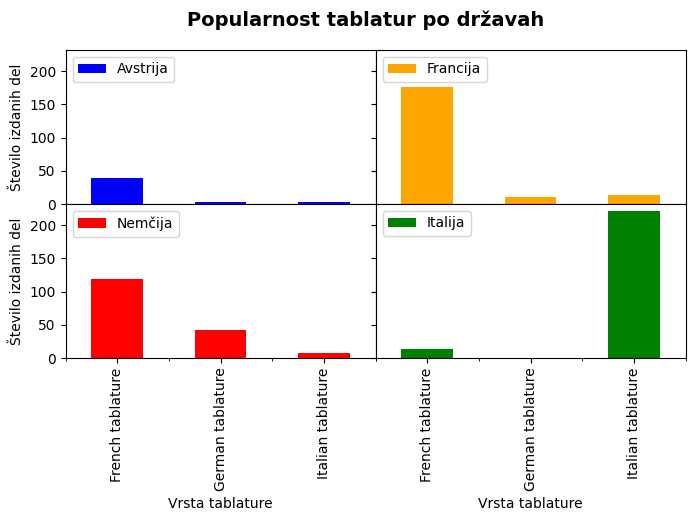

In [42]:
fig = plt.figure(figsize = (8, 4),)
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
axes= gs.subplots(sharex= True, sharey= True)

for ax in axes.flat:
    ax.set(ylabel= "Število izdanih del")

avstrija_tablatura = podatki[(podatki.DRŽAVA == "Austria") & (podatki.TABLATURA.isin([
    "French tablature", "Italian tablature", "German tablature"]))
    ].groupby("TABLATURA").size().plot.bar(ax=axes[0, 0], color= "blue", label = "Avstrija", legend = True)
nemčija_tablatura = podatki[(podatki.DRŽAVA == "Germany") & (podatki.TABLATURA.isin([
    "French tablature", "Italian tablature", "German tablature"]))
    ].groupby("TABLATURA").size().plot.bar(ax=axes[1, 0], color="red", label = "Nemčija", legend = True)
italija_tablatura = podatki[(podatki.DRŽAVA == "Italy") & (podatki.TABLATURA.isin([
    "French tablature", "Italian tablature", "German tablature"]))
    ].groupby("TABLATURA").size().add(pd.Series([0, 0, 0], index=[
        'French tablature', 'Italian tablature', 'German tablature'
        ])).plot.bar(ax=axes[1, 1], color= "green", label = "Italija", legend = True)
francija_tablatura = podatki[(podatki.DRŽAVA == "France") & (podatki.TABLATURA.isin([
    "French tablature", "Italian tablature", "German tablature"]))
    ].groupby("TABLATURA").size().plot.bar(ax=axes[0, 1], color= "orange", label = "Francija", legend=True)

francija_tablatura.legend(loc="upper left")
nemčija_tablatura.legend(loc="upper left")
avstrija_tablatura.legend(loc="upper left")

plt.suptitle("Popularnost tablatur po državah", fontsize=14, weight="bold")
for ax in axes.flat:
    ax.set(ylabel= "Število izdanih del")
    ax.set(xlabel= "Vrsta tablature")










Daleč najpopularnejša je bila torej francoska tablaturaa, opazimo pa tudi, da so Italijani večinoma uporabljali svojo italijansko tablaturo, medtem ko je druge države niso skoraj nikoli. Čeprav sta Nemčija in Avstrija obe izdali zelo veliko del, vidimo, da jih tu precej manjka. To nakazuje na to, da je veliko del v Avstriji in Nemčiji izšlo v 19. stoletju, ko potreba po opredelitvi notacije ni več potrebna, kar smo že videli v zgornji analizi.

Med zbranimi podatki pa niso le skladbe v notni obliki, temveč tudi kar nekaj razprav o glasbi za lutnjo in kitaro, o načinu zapisovanja, artikulaciji, tehniki igranja itd. V kateri državi pa je izšlo največ takšnih razprav?

Text(0.5, 1.0, 'Število izdanih razprav glede na državo')

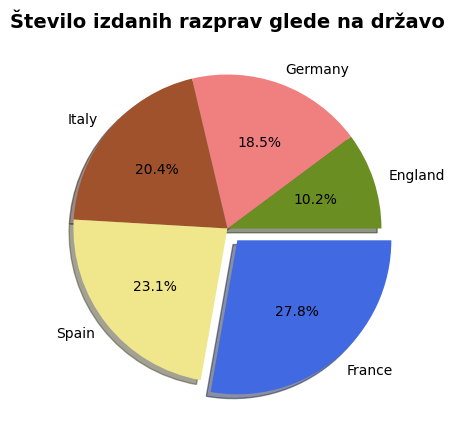

In [43]:
države_razprava = podatki[(podatki.DRŽAVA != "nan") & (podatki.RAZPRAVA == "DA")].groupby("DRŽAVA")
razprave_diagram = države_razprava.size().sort_values().tail(5).plot.pie(
    colors=['olivedrab', 'lightcoral', 'sienna', 'khaki', "royalblue"], 
    explode = (0, 0, 0, 0, 0.1), shadow=True, autopct='%1.1f%%', figsize = (5, 5))
plt.title("Število izdanih razprav glede na državo", fontsize=14, weight="bold")

Vidimo, da je Francija spet zmagovalka, čeprav ji tesno sledi Španija, država, o kateri do sedaj še nismo veliko slišali, vendar je očitno prispevala kar nekaj razprav o lutnji v svetovno literaturo.

## Najboljši trije v posameznih "disciplinah".

Spodaj so zbrani "najboljši trije" glede na število izdanih del, v posameznih disciplinah.

In [44]:
avtorji = podatki[podatki.AVTOR != None].groupby("AVTOR").size().sort_values(ascending= False).head(3).to_frame()
mesta = podatki[podatki.MESTO != None].groupby("MESTO").size().sort_values(ascending= False).head(3).to_frame()
države = podatki[podatki.DRŽAVA != None].groupby("DRŽAVA").size().sort_values(ascending= False).head(3).to_frame()
leta = podatki[podatki.LETO != 0].groupby("LETO").size().sort_values(ascending= False).head(3).to_frame()


b = pd.concat([avtorji, mesta, države, leta])
b.insert(loc = 0, column = "ZMAGOVALCI", value = b.index)
b.insert(loc = 0, column = "DISCIPLINA", value = ["", "AVTOR", "", "", "MESTO", "", "", "DRŽAVA", "", "", "LETO", ""])
b.reset_index(drop=True, inplace=True)
b.insert(loc = 2, column = "ŠTEVILO IZDAJ", value = b[b.columns[2]])
d = b.drop(columns=b.columns[3])
d

,DISCIPLINA,ZMAGOVALCI,ŠTEVILO IZDAJ
0,,"Call, Leonhard von",480
1,AVTOR,"Küffner, Joseph",187
2,,"Carulli, Ferdinando",174
3,,Paris,1237
4,MESTO,Vienna,745
5,,Mainz,359
6,,Germany,1991
7,DRŽAVA,France,1360
8,,Austria,789
9,,1800,500


## Popularnost kitare in lutnje ter njunih različic

Kdor ve kaj o zgodovinskih instrumentih, še posebej brenkalih, bo vedel, da so si ti instrumenti zelo različni v velikosti, obliki, zvoku, glasnosti, načinu igranja itd. Celo med lutnjami je veliko razlik, najbolj pomembna med njimi pa je ta, koliko strun ima. Navadno pa nas ne zanima, koliko posameznih strun ima lutnja, temveč koliko "skupin", najpogosteje parov, strun ima. Namreč, večina lutenj ima za večino dve struni, ki ju glasbenik zaigra istočasno in funkcionirata kot ena struna. Pogosto pa ima takšna lutnja recimo za najvišjo skupino strun samo eno struno, ki jo imenujemo "chanterelle". Zato v svetu lutnje navadno govorimo o številu parov oz. skupin strun (angl. course). Kako se med seboj primerjajo lutnje in kitare z raznolikim številom (parov) strun po popularnosti?

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '13'),
  Text(1, 0, '4'),
  Text(2, 0, '7'),
  Text(3, 0, '10'),
  Text(4, 0, '11'),
  Text(5, 0, '6'),
  Text(6, 0, '5')])

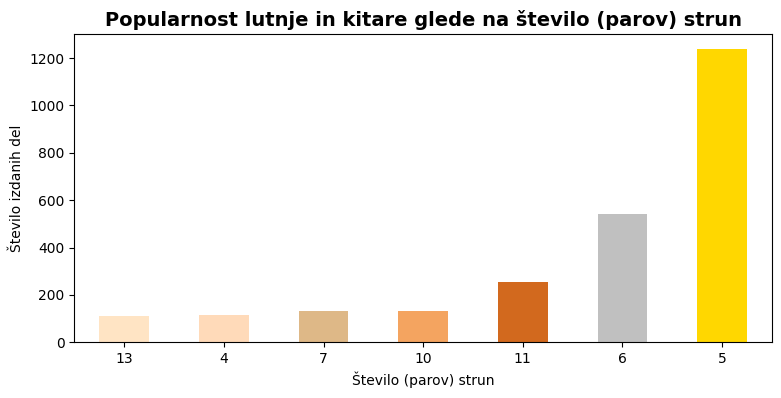

In [74]:
strune = podatki[(podatki.STRUNE != None)].groupby("STRUNE")
st = []
for x in range(9403):
    st += str(podatki.loc[x].at["STRUNE"]).split(", ")
table = pd.DataFrame(st, columns=['st'])
table[table.st != "nan"].groupby("st").size().sort_values().tail(7).plot.bar(
    figsize = (9, 4), color=["bisque", "peachpuff", "burlywood", "sandybrown", "chocolate", "silver", "gold"])
plt.title("Popularnost lutnje in kitare glede na število (parov) strun", fontsize=14, weight="bold")
plt.ylabel("Število izdanih del")
plt.xlabel("Število (parov) strun")
plt.xticks(rotation=0)



Nazadnje si poglejmo še popularnost lutnje proti popularnosti kitare skozi čas. Vemo, da je sčasoma lutnjo zamenjala kitara, in danes imamo eno daleč najbolj popularno verzijo, moderno klasično kitaro. Seveda pa ni bilo vedno tako. Oglejmo si, kako se je popularnost spreminjala v zgodovini.

[Text(0, 0.5, 'Število izdanih del'), Text(0.5, 0, 'Čas')]

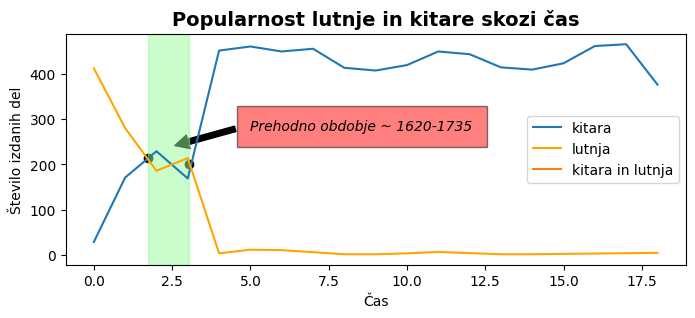

In [75]:
fig, ax = plt.subplots(1, figsize= (8,3))
plt.title("Popularnost lutnje in kitare skozi čas", fontsize=14, weight="bold")


plt.scatter(3.05,200, color= "black")
plt.scatter(1.72,214, color= "black")
kitara_čas = podatki[podatki.INSTRUMENT == "guitar"].groupby("ČAS").size().plot(ax=ax, label = "kitara", legend = True)
lutnja_čas = podatki[podatki.INSTRUMENT == "lute"].groupby("ČAS").size().plot(ax=ax, label = "lutnja", legend = True, color="orange")
kitaralutnja_čas = podatki[podatki.INSTRUMENT == "guitar, lute"].groupby("ČAS").size().plot(ax=ax, label = "kitara in lutnja", legend = True)

ax.text(5, 275, 'Prehodno obdobje ~ 1620-1735', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
puščica = (mpatches.FancyArrowPatch((4.6, 280), (2.5,240),
                                 mutation_scale=20, color="black"))
ax.add_patch(puščica)
ax.axvspan(1.72, 3.05, alpha=0.5, color='palegreen')

ax.set(ylabel= "Število izdanih del", xlabel="Čas")


Od 15. do začetka 17. stoletja je bila očitno bolj popularna lutnja, kar je smiselno, saj je prednica kitare. Nekje med letoma 1620 in 1735 sta približno enako uporabljeni in tu tudi dobimo slavne baročne kompozicije za lutnjo Johanna Sebastiana Bacha in njegovega prijatelja Silviusa Leopolda Weissa. Kmalu po letu 1750 pa se za lutnjo skoraj ni pisalo več, saj jo je izpodrinila kitara.